In [4]:
import os
import sys
import json
import pickle as pk
import numpy as np
import pandas as pd
from collections import Counter
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
data_dir = "/Users/shiva/Desktop/data_maestro"

In [6]:
df = pd.read_csv("{}/train.csv".format(data_dir), parse_dates=['datetime'])
print("Records: {}, Size: {} Mb".format(len(df), round(sys.getsizeof(df)/(1024*1024))))
df.head()

Records: 3947625, Size: 211 Mb


,instrument,datetime,open,high,low,close,volume
0,1793,2023-01-09 09:15:00,602.75,604.25,599.65,601.45,6888
1,1793,2023-01-09 09:16:00,600.75,604.60,600.25,603.50,6775
2,1793,2023-01-09 09:17:00,604.60,604.75,601.00,601.00,5046
3,1793,2023-01-09 09:18:00,601.25,601.30,600.00,600.95,4408
4,1793,2023-01-09 09:19:00,600.95,603.00,600.65,602.85,2437


In [64]:
df_tmp = df[['instrument', 'datetime', 'open']]
df_tmp.head()

,instrument,datetime,open
0,1793,2023-01-09 09:15:00,602.75
1,1793,2023-01-09 09:16:00,600.75
2,1793,2023-01-09 09:17:00,604.60
3,1793,2023-01-09 09:18:00,601.25
4,1793,2023-01-09 09:19:00,600.95


In [84]:
df_pivot = df_tmp.pivot(index='datetime', columns='instrument', values='open')
df_pivot.reset_index(level=0, inplace=True)
new_column_names = {col: i-1 for i, col in enumerate(df_pivot.columns) if col != 'datetime'}
# Rename the columns
df_pivot.rename(columns=new_column_names, inplace=True)
df_pivot['OT'] = df_pivot[318]

In [85]:
df_pivot.head()

instrument,datetime,0,1,2,3,4,5,6,7,8,...,310,311,312,313,314,315,316,317,318,OT
0,2023-01-09 09:15:00,602.75,2861.05,2428.05,3843.00,881.00,587.80,1204.70,4424.35,330.00,...,898.40,87.55,1127.80,188.30,194.74,279.35,141.25,1451.25,38.90,38.90
1,2023-01-09 09:16:00,600.75,2863.60,2437.05,3854.15,878.95,589.70,1209.80,4407.30,329.10,...,905.00,87.40,1128.65,187.85,195.59,278.45,141.45,1458.05,38.80,38.80
2,2023-01-09 09:17:00,604.60,2863.25,2450.90,3857.70,883.30,589.95,1209.55,4408.30,328.75,...,903.05,87.75,1130.30,187.95,195.62,278.35,141.65,1457.60,38.75,38.75
3,2023-01-09 09:18:00,601.25,2867.00,2452.85,3861.95,880.80,589.85,1211.15,4425.40,328.20,...,904.75,87.50,1132.70,188.00,195.65,277.50,141.85,1460.75,38.65,38.65
4,2023-01-09 09:19:00,600.95,2871.25,2453.00,3858.00,881.90,588.85,1211.00,4419.75,328.45,...,905.00,87.65,1133.05,188.40,195.50,277.20,142.10,1460.95,38.75,38.75


In [88]:
df_pivot.to_csv('{}/transformed.csv'.format(data_dir), index=False)

In [89]:
pd.read_csv('{}/transformed.csv'.format(data_dir))

,datetime,0,1,2,3,4,5,6,7,8,...,310,311,312,313,314,315,316,317,318,OT
0,2023-01-09 09:15:00,602.75,2861.05,2428.05,3843.00,881.00,587.80,1204.70,4424.35,330.00,...,898.40,87.55,1127.80,188.30,194.74,279.35,141.25,1451.25,38.90,38.90
1,2023-01-09 09:16:00,600.75,2863.60,2437.05,3854.15,878.95,589.70,1209.80,4407.30,329.10,...,905.00,87.40,1128.65,187.85,195.59,278.45,141.45,1458.05,38.80,38.80
2,2023-01-09 09:17:00,604.60,2863.25,2450.90,3857.70,883.30,589.95,1209.55,4408.30,328.75,...,903.05,87.75,1130.30,187.95,195.62,278.35,141.65,1457.60,38.75,38.75
3,2023-01-09 09:18:00,601.25,2867.00,2452.85,3861.95,880.80,589.85,1211.15,4425.40,328.20,...,904.75,87.50,1132.70,188.00,195.65,277.50,141.85,1460.75,38.65,38.65
4,2023-01-09 09:19:00,600.95,2871.25,2453.00,3858.00,881.90,588.85,1211.00,4419.75,328.45,...,905.00,87.65,1133.05,188.40,195.50,277.20,142.10,1460.95,38.75,38.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12370,2023-02-23 15:25:00,521.00,3137.40,1733.70,1387.25,866.75,570.90,1358.05,4446.55,327.90,...,777.90,89.00,1265.85,174.75,191.05,230.95,102.70,1382.45,33.30,33.30
12371,2023-02-23 15:26:00,521.10,3138.50,1732.45,1387.90,867.30,572.45,1359.00,4437.45,328.05,...,777.00,89.00,1262.00,175.05,191.05,230.95,102.75,1382.00,33.30,33.30
12372,2023-02-23 15:27:00,520.80,3139.50,1732.90,1388.05,866.25,572.15,1358.95,4443.90,327.95,...,777.45,89.05,1264.55,175.10,191.04,230.90,102.75,1383.20,33.30,33.30
12373,2023-02-23 15:28:00,521.50,3133.70,1733.05,1387.95,867.35,571.75,1359.00,4443.80,327.50,...,776.75,89.25,1264.40,174.45,191.04,230.85,102.95,1390.00,33.35,33.35


In [58]:
df.instrument.nunique()

2876

In [8]:
df = pd.read_csv("{}/train.csv".format(data_dir), parse_dates=['datetime'])
print("Records: {}, Size: {} Mb".format(len(df), round(sys.getsizeof(df)/(1024*1024))))
df.head()

Records: 4838625, Size: 258 Mb


,instrument,datetime,open,high,low,close,volume
0,264713,2023-01-09 09:15:00,2297.11,2297.11,2297.11,2297.11,0
1,264713,2023-01-09 09:16:00,2297.11,2297.11,2297.11,2297.11,0
2,264713,2023-01-09 09:17:00,2297.11,2297.11,2297.11,2297.11,0
3,264713,2023-01-09 09:18:00,2297.11,2297.11,2297.11,2297.11,0
4,264713,2023-01-09 09:19:00,2297.11,2297.11,2297.11,2297.11,0


In [10]:
df.instrument.nunique()

391

In [7]:
df = pd.read_csv("{}/ltsf.csv".format(data_dir), parse_dates=['datetime'])
print("Records: {}, Size: {} Mb".format(len(df), round(sys.getsizeof(df)/(1024*1024))))
df.head()

Records: 15750, Size: 38 Mb


,datetime,1793,3329,5633,6401,12289,25601,32769,40193,41729,...,6191105,6201601,6386689,6599681,7458561,7565569,7707649,7712001,7982337,8042241
0,2023-01-09 09:15:00,602.75,2861.05,2428.05,3843.00,881.00,587.80,1204.70,4424.35,330.00,...,3304.60,898.40,87.55,1127.80,188.30,194.74,279.35,141.25,1451.25,38.90
1,2023-01-09 09:16:00,600.75,2863.60,2437.05,3854.15,878.95,589.70,1209.80,4407.30,329.10,...,3309.65,905.00,87.40,1128.65,187.85,195.59,278.45,141.45,1458.05,38.80
2,2023-01-09 09:17:00,604.60,2863.25,2450.90,3857.70,883.30,589.95,1209.55,4408.30,328.75,...,3303.35,903.05,87.75,1130.30,187.95,195.62,278.35,141.65,1457.60,38.75
3,2023-01-09 09:18:00,601.25,2867.00,2452.85,3861.95,880.80,589.85,1211.15,4425.40,328.20,...,3303.45,904.75,87.50,1132.70,188.00,195.65,277.50,141.85,1460.75,38.65
4,2023-01-09 09:19:00,600.95,2871.25,2453.00,3858.00,881.90,588.85,1211.00,4419.75,328.45,...,3306.00,905.00,87.65,1133.05,188.40,195.50,277.20,142.10,1460.95,38.75


In [12]:
df.instrument.nunique()

391

In [3]:
os.chdir('/Users/shiva/Desktop/maestro/maestro/dataloader')

In [4]:
from dataloader import HistoricalDataCSV

In [52]:
dataloader = HistoricalDataCSV(data_dir, mode='train', sequence_length=120, predict_window=10, price_cutoff=1,
                               debug=1)

[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2.]


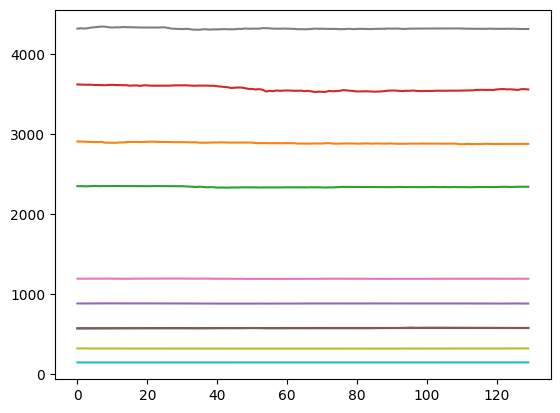

In [53]:
dataloader[1]

- 0: sell
- 1: buy
- 2: do nothing

In [54]:
traffic_df = pd.read_csv("{}/traffic.csv".format(data_dir))

In [55]:
traffic_df.head()

,date,0,1,2,3,4,5,6,7,8,...,852,853,854,855,856,857,858,859,860,OT
0,2016-07-01 02:00:00,0.0048,0.0146,0.0289,0.0142,0.0064,0.0232,0.0162,0.0242,0.0341,...,0.0051,0.0051,0.0074,0.0079,0.0051,0.0051,0.0339,0.0051,0.0100,0.0121
1,2016-07-01 03:00:00,0.0072,0.0148,0.0350,0.0174,0.0084,0.0240,0.0201,0.0338,0.0434,...,0.0036,0.0036,0.0107,0.0058,0.0036,0.0036,0.0348,0.0036,0.0087,0.0136
2,2016-07-01 04:00:00,0.0040,0.0101,0.0267,0.0124,0.0049,0.0170,0.0127,0.0255,0.0332,...,0.0030,0.0030,0.0043,0.0050,0.0030,0.0030,0.0327,0.0030,0.0061,0.0107
3,2016-07-01 05:00:00,0.0039,0.0060,0.0218,0.0090,0.0029,0.0118,0.0088,0.0163,0.0211,...,0.0033,0.0033,0.0019,0.0052,0.0033,0.0033,0.0292,0.0033,0.0040,0.0071
4,2016-07-01 06:00:00,0.0042,0.0055,0.0191,0.0082,0.0024,0.0095,0.0064,0.0087,0.0144,...,0.0049,0.0049,0.0011,0.0071,0.0049,0.0049,0.0264,0.0049,0.0040,0.0039


In [56]:
traffic_df.columns

Index(['date', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '852', '853', '854', '855', '856', '857', '858', '859', '860', 'OT'],
      dtype='object', length=863)